<h1 style="text-align: center; color: #E30613;"><b><i>Entraînement des Modèles sur les Données de Sentiments</i></b></h1>

Ce notebook explore un pipeline complet pour l'analyse des sentiments à partir de données textuelles. Voici les étapes principales couvertes :

<ol>
    <li><b>Chargement des Données</b> : Importation des données à partir d'un fichier CSV et exploration initiale.</li>
    <li><b>Prétraitement des Données</b> : Nettoyage des données, suppression des valeurs manquantes et encodage des étiquettes.</li>
    <li><b>Division des Données</b> : Séparation des données en ensembles d'entraînement, de validation et de test.</li>
    <li><b>Vectorisation</b> : Transformation des données textuelles en représentations numériques à l'aide de <code>CountVectorizer</code> et <code>TfidfVectorizer</code>.</li>
    <li><b>Entraînement des Modèles</b> : Application de plusieurs algorithmes de classification, notamment :
        <ul>
            <li>Régression Logistique</li>
            <li>SVM (Support Vector Machine)</li>
            <li>Arbre de Décision</li>
            <li>Naive Bayes</li>
            <li>LightGBM</li>
        </ul>
    </li>
    <li><b>Évaluation des Modèles</b> : Analyse des performances des modèles à l'aide de métriques telles que l'accuracy, les matrices de confusion et les rapports de classification.</li>
    <li><b>Visualisation</b> : Utilisation de graphiques pour interpréter les résultats et comparer les performances des modèles.</li>
</ol>

Chaque étape est documentée et accompagnée de visualisations pour une meilleure compréhension des résultats.

## <span style="color: #28A745;">**Bibiliothèques nécessaires**</span>

In [ ]:
%pip install pandas numpy scikit-learn matplotlib seaborn lightgbm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <span style="color: #28A745;">**Chargement des Données**</span>

In [ ]:
# Lire le fichier CSV contenant les commentaires nettoyés
file_path = "/content/Comments_clean.csv"
df = pd.read_csv(file_path)

# Afficher les 5 premières lignes du DataFrame
df.head()

,ID Post,User Name,Comments,Sentiments
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif
1,1,Jj Kie,عام انتم بخير,Positif
2,1,Sakou Younes,عام انتم بخير,Positif
3,1,راني نعاني,عام بخير,Positif
4,1,أحمد فيراس,حب,Positif


## <span style="color: #28A745;">**Encodage des étiquettes de sentiments**</span>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Verifier les colonnes du DataFrame
df = df.dropna(subset=["Comments"])

label_encoder = LabelEncoder()
df["Sentiments_encoded"] = label_encoder.fit_transform(df["Sentiments"])

# Séparer les données en variables d'entrée (X) et cible (y)
X = df["Comments"]
y = df["Sentiments_encoded"]

## <span style="color: #28A745;">**Division en jeu d'entraînement, validation et de test**</span>

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% pour train+validation, 20% pour test)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1 (70% pour train, 10% pour validation)

## <span style="color: #28A745;">**Vectorisation (CountVectorizer & TFIDFVectorizer)**</span>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Afficher les dimensions des matrices vectorisées
{
    "CountVectorizer train shape": X_train_count.shape,
    "CountVectorizer val shape": X_val_count.shape,
    "CountVectorizer test shape": X_test_count.shape,
    "TF-IDF train shape": X_train_tfidf.shape,
    "TF-IDF val shape": X_val_tfidf.shape,
    "TF-IDF test shape": X_test_tfidf.shape,
    "Classes": label_encoder.classes_
}

{'CountVectorizer train shape': (2529, 4615),
 'CountVectorizer val shape': (362, 4615),
 'CountVectorizer test shape': (723, 4615),
 'TF-IDF train shape': (2529, 4615),
 'TF-IDF val shape': (362, 4615),
 'TF-IDF test shape': (723, 4615),
 'Classes': array(['Negatif', 'Neutre', 'Positif'], dtype=object)}

## <span style="color: #E30613;">**1. Régression Logistique**</span>

In [ ]:
from sklearn.linear_model import LogisticRegression

### <span style="color: #28A745;">**1.1. Régression Logistique avec CountVectorizer**</span>

In [ ]:
# Entraînement et évaluation avec CountVectorizer
logistic_model_count = LogisticRegression(C=3, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count = logistic_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count = logistic_model_count.predict(X_val_count)

# Rapport complet pour CountVectorizer
print("Rapport pour LogisticRegression avec CountVectorizer (test):")
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer: {accuracy_count:.2f}")
print(classification_report(y_test, y_pred_count, target_names=label_encoder.classes_))

# Validation avec CountVectorizer
accuracy_val_count = accuracy_score(y_val, y_val_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer (validation): {accuracy_val_count:.2f}")
print(classification_report(y_val, y_val_pred_count, target_names=label_encoder.classes_))

# Matrice de confusion pour CountVectorizer (test)
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour CountVectorizer (validation)
conf_matrix_val_count = confusion_matrix(y_val, y_val_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

### <span style="color: #28A745;">**1.2. Régression Logistique avec TF-IDF Vectorizer**</span>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec CountVectorizer (test):
Accuracy pour LogisticRegression avec CountVectorizer: 0.87
              precision    recall  f1-score   support

     Negatif       0.90      0.81      0.85       178
      Neutre       0.78      0.89      0.83       233
     Positif       0.94      0.90      0.92       312

    accuracy                           0.87       723
   macro avg       0.87      0.86      0.87       723
weighted avg       0.88      0.87      0.87       723

Accuracy pour LogisticRegression avec CountVectorizer (validation): 0.90
              precision    recall  f1-score   support

     Negatif       0.89      0.83      0.86        76
      Neutre       0.84      0.89      0.86       123
     Positif       0.95      0.94      0.94       163

    accuracy                           0.90       362
   macro avg       0.89      0.88      0.89       362
weighted avg       0.90      0.90      0.90       362



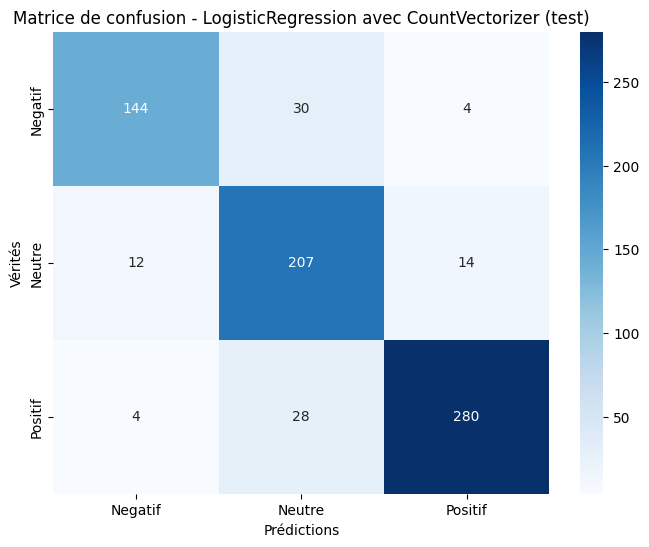

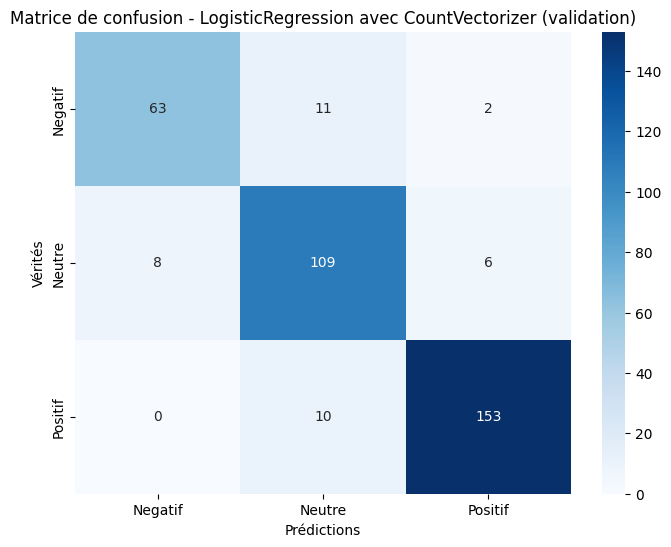

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec TF-IDF:
Accuracy pour LogisticRegression avec TF-IDF (test): 0.87
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       178
      Neutre       0.79      0.82      0.81       233
     Positif       0.93      0.91      0.92       312

    accuracy                           0.87       723
   macro avg       0.86      0.86      0.86       723
weighted avg       0.87      0.87      0.87       723

Accuracy pour LogisticRegression avec TF-IDF (validation): 0.90
              precision    recall  f1-score   support

     Negatif       0.87      0.89      0.88        76
      Neutre       0.85      0.86      0.86       123
     Positif       0.94      0.93      0.93       163

    accuracy                           0.90       362
   macro avg       0.89      0.89      0.89       362
weighted avg       0.90      0.90      0.90       362



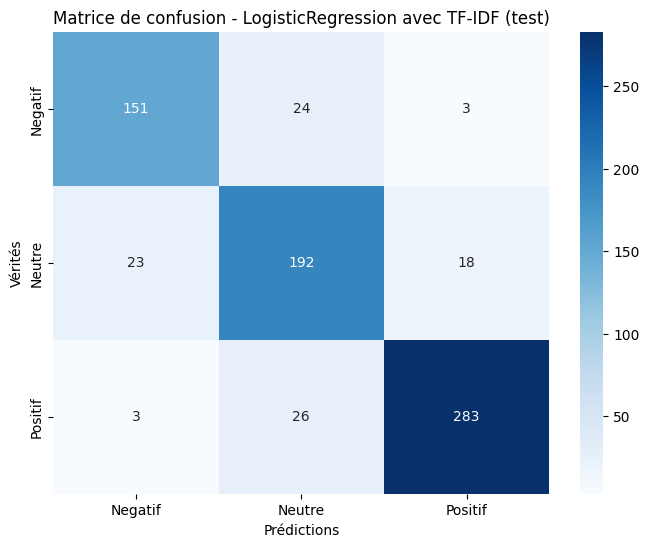

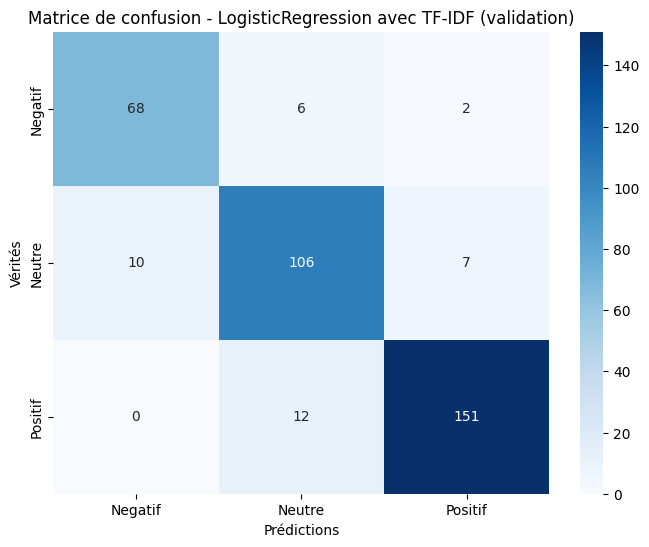

In [ ]:
# Entraînement et évaluation avec TF-IDF
logistic_model_tfidf = LogisticRegression(C=10, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf = logistic_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour TF-IDF
print("Rapport pour LogisticRegression avec TF-IDF:")
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (test): {accuracy_tfidf:.2f}")
print(classification_report(y_test, y_pred_tfidf, target_names=label_encoder.classes_))

# Validation avec TF-IDF
accuracy_val_tfidf = accuracy_score(y_val, y_val_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (validation): {accuracy_val_tfidf:.2f}")
print(classification_report(y_val, y_val_pred_tfidf, target_names=label_encoder.classes_))

# Matrice de confusion pour TF-IDF (test)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour TF-IDF (validation)
conf_matrix_val_tfidf = confusion_matrix(y_val, y_val_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## <span style="color: #E30613;">**2. SVM (Support Vector Machine)**</span>

In [ ]:
from sklearn.svm import SVC

### <span style="color: #28A745;">**2.1. SVM avec CountVectorizer**</span>

In [ ]:
# Entraînement et évaluation avec CountVectorizer
svc_model_count = SVC(C=3, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_svc = svc_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_svc = svc_model_count.predict(X_val_count)

# Rapport complet pour SVC avec CountVectorizer
print("Rapport pour SVC avec CountVectorizer:")
# Accuracy pour CountVectorizer (test)
accuracy_count_svc = accuracy_score(y_test, y_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (test): {accuracy_count_svc:.2f}")
print(classification_report(y_test, y_pred_count_svc, target_names=label_encoder.classes_))

# Accuracy pour CountVectorizer (validation)
accuracy_val_count_svc = accuracy_score(y_val, y_val_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (validation): {accuracy_val_count_svc:.2f}")
print(classification_report(y_val, y_val_pred_count_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec CountVectorizer (test)
conf_matrix_count_svc = confusion_matrix(y_test, y_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour SVC avec CountVectorizer (validation)
conf_matrix_val_count_svc = confusion_matrix(y_val, y_val_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

### <span style="color: #28A745;">**2.2. SVM avec TF-IDF Vectorizer**</span>

Rapport pour SVC avec CountVectorizer:
Accuracy pour SVC avec CountVectorizer (test): 0.86
              precision    recall  f1-score   support

     Negatif       0.87      0.81      0.84       178
      Neutre       0.77      0.86      0.81       233
     Positif       0.94      0.89      0.92       312

    accuracy                           0.86       723
   macro avg       0.86      0.85      0.86       723
weighted avg       0.87      0.86      0.86       723

Accuracy pour SVC avec CountVectorizer (validation): 0.85
              precision    recall  f1-score   support

     Negatif       0.78      0.80      0.79        76
      Neutre       0.77      0.80      0.78       123
     Positif       0.95      0.91      0.93       163

    accuracy                           0.85       362
   macro avg       0.83      0.84      0.83       362
weighted avg       0.85      0.85      0.85       362



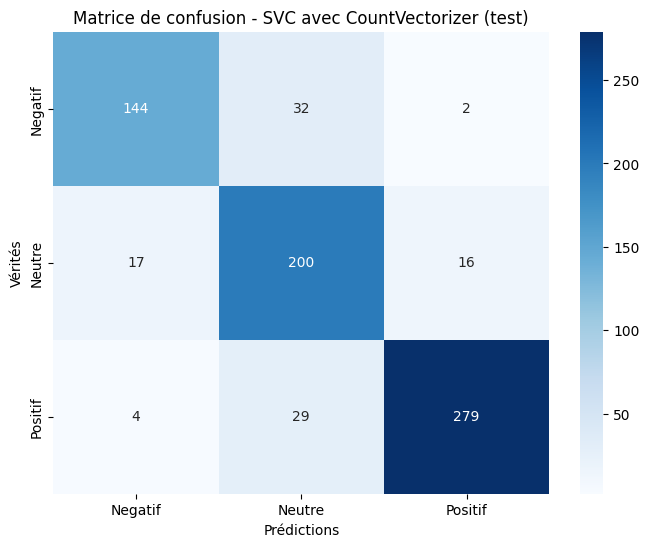

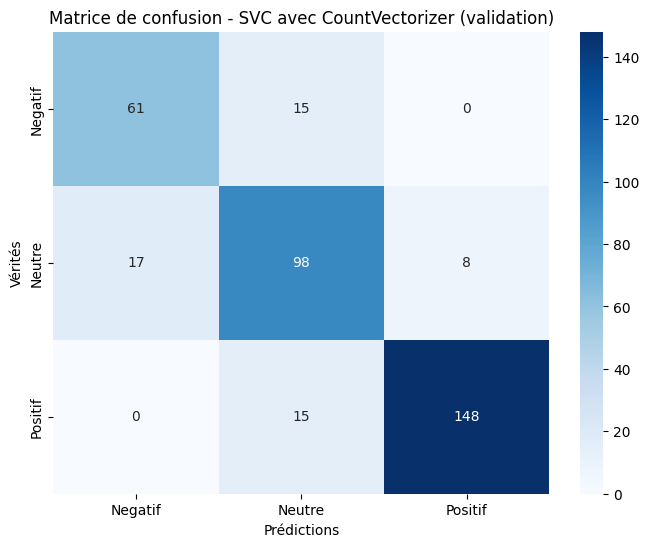

Rapport pour SVC avec TF-IDF:
Accuracy pour SVC avec TF-IDF (test): 0.87
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       178
      Neutre       0.79      0.84      0.81       233
     Positif       0.95      0.90      0.92       312

    accuracy                           0.87       723
   macro avg       0.86      0.86      0.86       723
weighted avg       0.87      0.87      0.87       723

Accuracy pour SVC avec TF-IDF (validation): 0.89
              precision    recall  f1-score   support

     Negatif       0.87      0.89      0.88        76
      Neutre       0.82      0.88      0.85       123
     Positif       0.96      0.90      0.93       163

    accuracy                           0.89       362
   macro avg       0.89      0.89      0.89       362
weighted avg       0.90      0.89      0.89       362



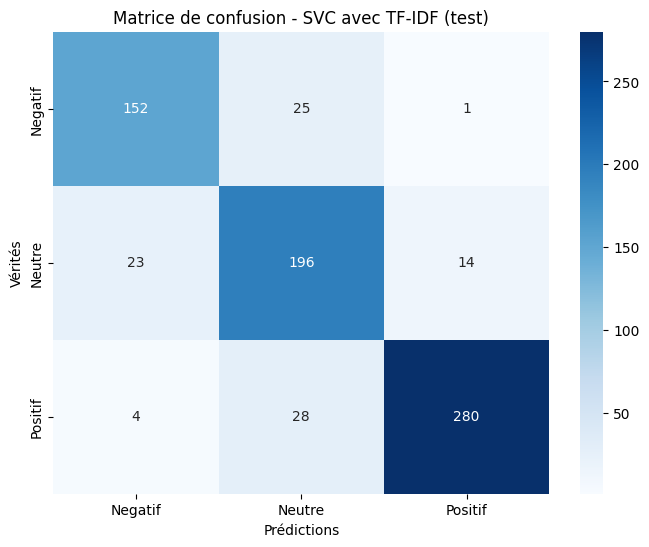

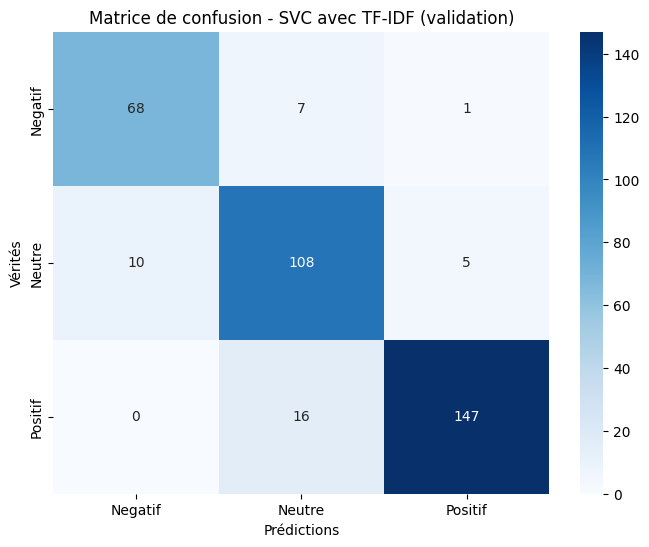

In [ ]:
# Entraînement et évaluation avec TF-IDF
svc_model_tfidf = SVC(C=1, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_svc = svc_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_svc = svc_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour SVC avec TF-IDF
print("Rapport pour SVC avec TF-IDF:")
# Accuracy pour TF-IDF (test)
accuracy_tfidf_svc = accuracy_score(y_test, y_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (test): {accuracy_tfidf_svc:.2f}")
print(classification_report(y_test, y_pred_tfidf_svc, target_names=label_encoder.classes_))

# Accuracy pour TF-IDF (validation)
accuracy_val_tfidf_svc = accuracy_score(y_val, y_val_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (validation): {accuracy_val_tfidf_svc:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec TF-IDF (test)
conf_matrix_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour SVC avec TF-IDF (validation)
conf_matrix_val_tfidf_svc = confusion_matrix(y_val, y_val_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## <span style="color: #E30613;">**3. Arbre de Décision**</span>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### <span style="color: #28A745;">**3.1. Arbre de Décision avec CountVectorizer**</span>

In [ ]:
# Entraînement et évaluation avec CountVectorizer
decision_tree_model_count = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_dt = decision_tree_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_dt = decision_tree_model_count.predict(X_val_count)

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer (test)
print("Rapport pour DecisionTreeClassifier avec CountVectorizer (test):")
accuracy_count_dt = accuracy_score(y_test, y_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (test): {accuracy_count_dt:.2f}")
print(classification_report(y_test, y_pred_count_dt, target_names=label_encoder.classes_))

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer (validation)
print("Rapport pour DecisionTreeClassifier avec CountVectorizer (validation):")
accuracy_val_count_dt = accuracy_score(y_val, y_val_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): {accuracy_val_count_dt:.2f}")
print(classification_report(y_val, y_val_pred_count_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer (test)
conf_matrix_count_dt = confusion_matrix(y_test, y_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer (validation)
conf_matrix_val_count_dt = confusion_matrix(y_val, y_val_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

### <span style="color: #28A745;">**3.2. Arbre de Décision avec TF-IDF Vectorizer**</span>

Rapport pour DecisionTreeClassifier avec CountVectorizer (test):
Accuracy pour DecisionTreeClassifier avec CountVectorizer (test): 0.82
              precision    recall  f1-score   support

     Negatif       0.86      0.75      0.80       178
      Neutre       0.68      0.88      0.76       233
     Positif       0.95      0.81      0.88       312

    accuracy                           0.82       723
   macro avg       0.83      0.81      0.81       723
weighted avg       0.84      0.82      0.82       723

Rapport pour DecisionTreeClassifier avec CountVectorizer (validation):
Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): 0.84
              precision    recall  f1-score   support

     Negatif       0.79      0.75      0.77        76
      Neutre       0.75      0.85      0.79       123
     Positif       0.95      0.88      0.92       163

    accuracy                           0.84       362
   macro avg       0.83      0.83      0.83       362
weighted 

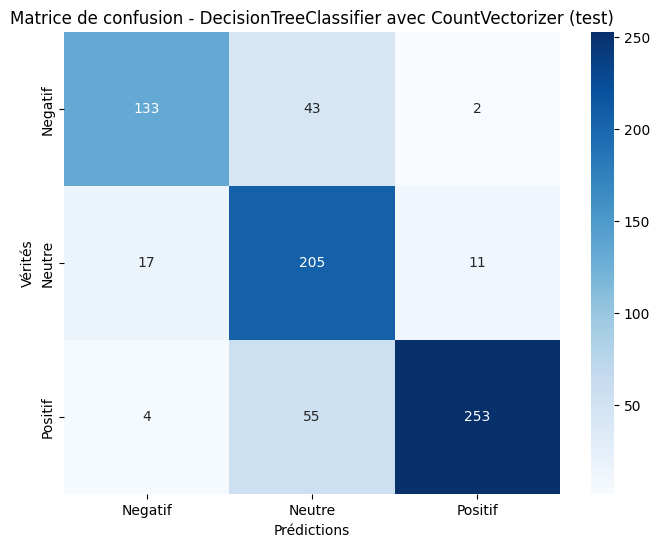

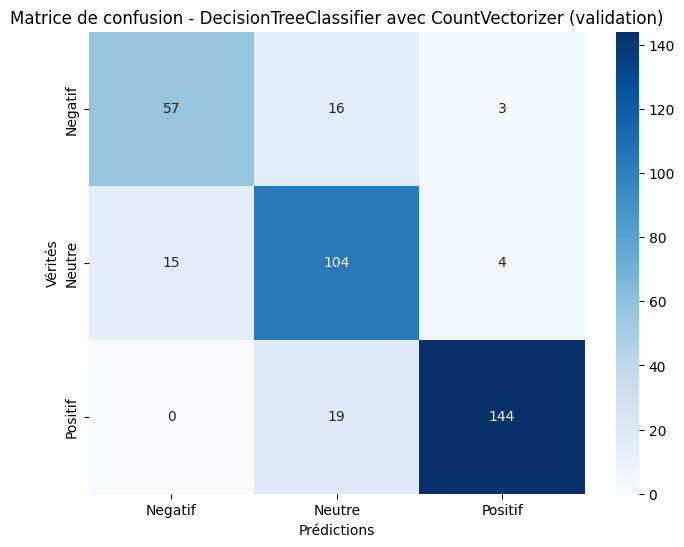

Rapport pour DecisionTreeClassifier avec TF-IDF (test):
Accuracy pour DecisionTreeClassifier avec TF-IDF (test): 0.82
              precision    recall  f1-score   support

     Negatif       0.84      0.76      0.80       178
      Neutre       0.71      0.83      0.76       233
     Positif       0.92      0.84      0.88       312

    accuracy                           0.82       723
   macro avg       0.82      0.81      0.81       723
weighted avg       0.83      0.82      0.82       723

Rapport pour DecisionTreeClassifier avec TF-IDF (validation):
Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): 0.84
              precision    recall  f1-score   support

     Negatif       0.79      0.78      0.78        76
      Neutre       0.77      0.77      0.77       123
     Positif       0.91      0.91      0.91       163

    accuracy                           0.84       362
   macro avg       0.82      0.82      0.82       362
weighted avg       0.84      0.84      0.84  

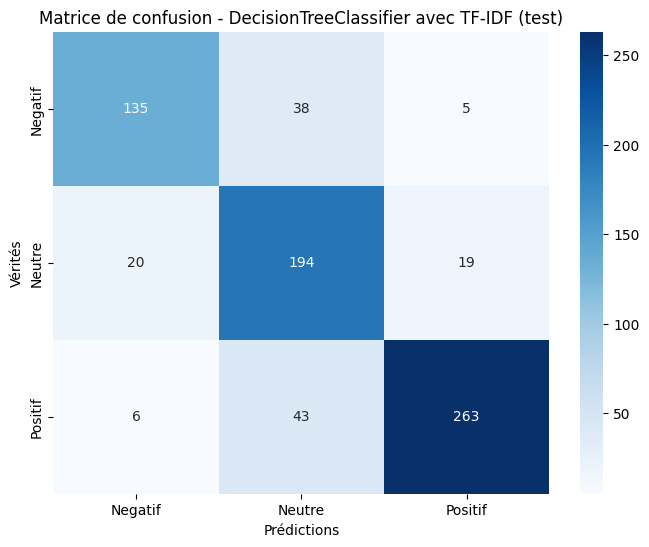

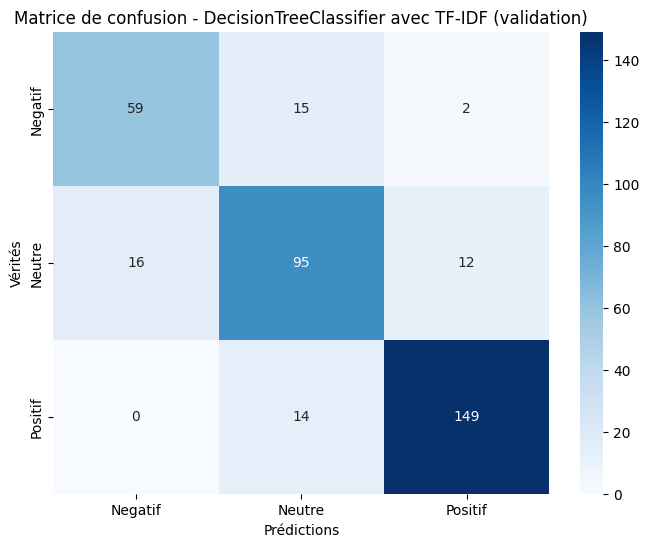

In [ ]:
# Entraînement et évaluation avec TF-IDF
decision_tree_model_tfidf = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour DecisionTreeClassifier avec TF-IDF (test)
print("Rapport pour DecisionTreeClassifier avec TF-IDF (test):")
accuracy_tfidf_dt = accuracy_score(y_test, y_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (test): {accuracy_tfidf_dt:.2f}")
print(classification_report(y_test, y_pred_tfidf_dt, target_names=label_encoder.classes_))

# Rapport complet pour DecisionTreeClassifier avec TF-IDF (validation)
print("Rapport pour DecisionTreeClassifier avec TF-IDF (validation):")
accuracy_val_tfidf_dt = accuracy_score(y_val, y_val_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): {accuracy_val_tfidf_dt:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF (test)
conf_matrix_tfidf_dt = confusion_matrix(y_test, y_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF (validation)
conf_matrix_val_tfidf_dt = confusion_matrix(y_val, y_val_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## <span style="color: #E30613;">**4. Naive Bayes**</span>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

### <span style="color: #28A745;">**4.1. Naive Bayes avec CountVectorizer**</span>

In [ ]:
# Entraînement et évaluation avec CountVectorizer
nb_model_count = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_nb = nb_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_nb = nb_model_count.predict(X_val_count)

# Rapport complet pour MultinomialNB avec CountVectorizer (test)
print("Rapport pour MultinomialNB avec CountVectorizer (test):")
accuracy_count_nb = accuracy_score(y_test, y_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (test): {accuracy_count_nb:.2f}")
print(classification_report(y_test, y_pred_count_nb, target_names=label_encoder.classes_))

# Rapport complet pour MultinomialNB avec CountVectorizer (validation)
print("Rapport pour MultinomialNB avec CountVectorizer (validation):")
accuracy_val_count_nb = accuracy_score(y_val, y_val_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (validation): {accuracy_val_count_nb:.2f}")
print(classification_report(y_val, y_val_pred_count_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec CountVectorizer (test)
conf_matrix_count_nb = confusion_matrix(y_test, y_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour MultinomialNB avec CountVectorizer (validation)
conf_matrix_val_count_nb = confusion_matrix(y_val, y_val_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

### <span style="color: #28A745;">**4.2. Naive Bayes avec TF-IDF Vectorizer**</span>

Rapport pour MultinomialNB avec CountVectorizer (test):
Accuracy pour MultinomialNB avec CountVectorizer (test): 0.88
              precision    recall  f1-score   support

     Negatif       0.86      0.88      0.87       178
      Neutre       0.82      0.80      0.81       233
     Positif       0.93      0.93      0.93       312

    accuracy                           0.88       723
   macro avg       0.87      0.87      0.87       723
weighted avg       0.88      0.88      0.88       723

Rapport pour MultinomialNB avec CountVectorizer (validation):
Accuracy pour MultinomialNB avec CountVectorizer (validation): 0.90
              precision    recall  f1-score   support

     Negatif       0.84      0.92      0.88        76
      Neutre       0.87      0.82      0.85       123
     Positif       0.94      0.94      0.94       163

    accuracy                           0.90       362
   macro avg       0.89      0.90      0.89       362
weighted avg       0.90      0.90      0.90  

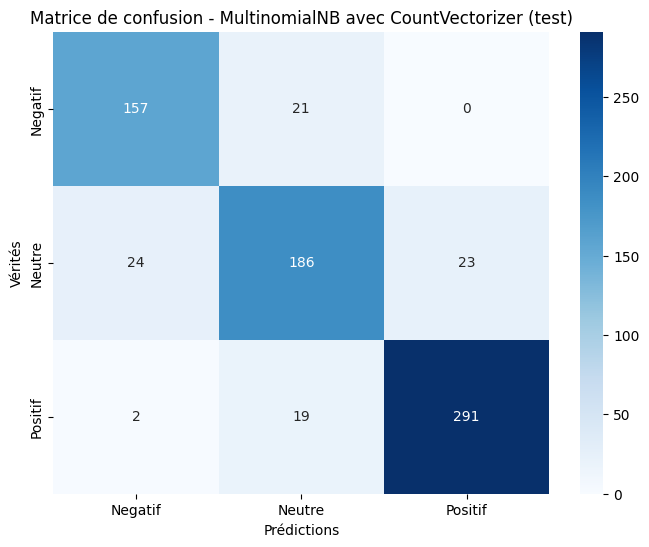

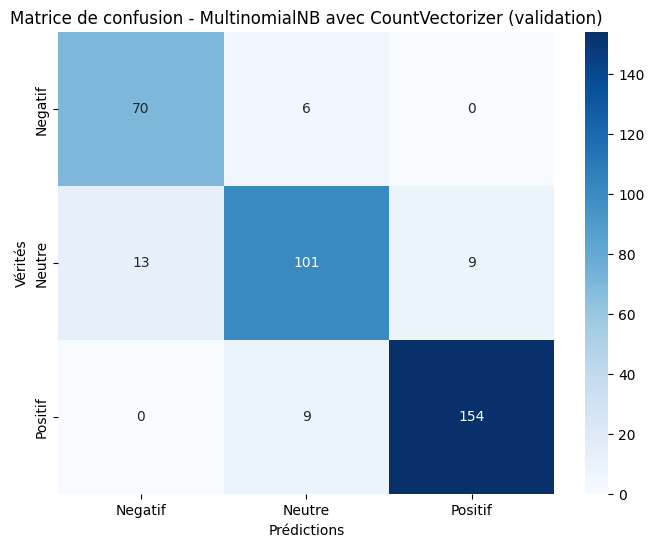

Rapport pour MultinomialNB avec TF-IDF (test):
Accuracy pour MultinomialNB avec TF-IDF (test): 0.87
              precision    recall  f1-score   support

     Negatif       0.88      0.82      0.85       178
      Neutre       0.81      0.82      0.82       233
     Positif       0.91      0.94      0.92       312

    accuracy                           0.87       723
   macro avg       0.87      0.86      0.86       723
weighted avg       0.87      0.87      0.87       723

Rapport pour MultinomialNB avec TF-IDF (validation):
Accuracy pour MultinomialNB avec TF-IDF (validation): 0.91
              precision    recall  f1-score   support

     Negatif       0.89      0.89      0.89        76
      Neutre       0.88      0.87      0.87       123
     Positif       0.95      0.95      0.95       163

    accuracy                           0.91       362
   macro avg       0.91      0.91      0.91       362
weighted avg       0.91      0.91      0.91       362



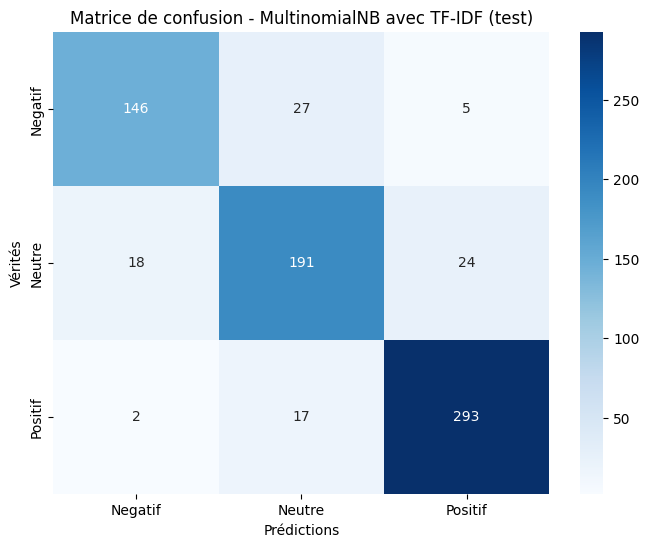

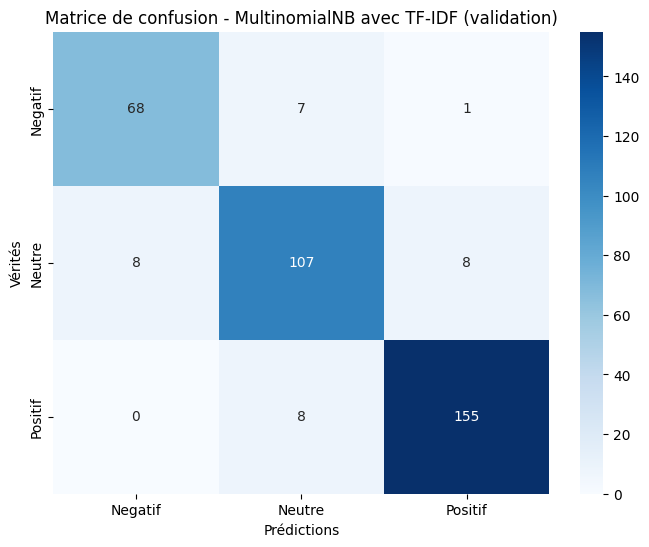

In [ ]:
# Entraînement et évaluation avec TF-IDF
nb_model_tfidf = MultinomialNB(alpha=1, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_nb = nb_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_nb = nb_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour MultinomialNB avec TF-IDF (test)
print("Rapport pour MultinomialNB avec TF-IDF (test):")
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (test): {accuracy_tfidf_nb:.2f}")
print(classification_report(y_test, y_pred_tfidf_nb, target_names=label_encoder.classes_))

# Rapport complet pour MultinomialNB avec TF-IDF (validation)
print("Rapport pour MultinomialNB avec TF-IDF (validation):")
accuracy_val_tfidf_nb = accuracy_score(y_val, y_val_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (validation): {accuracy_val_tfidf_nb:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec TF-IDF (test)
conf_matrix_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour MultinomialNB avec TF-IDF (validation)
conf_matrix_val_tfidf_nb = confusion_matrix(y_val, y_val_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## <span style="color: #E30613;">**5. LightGBM**</span>

In [ ]:
from lightgbm import LGBMClassifier

### <span style="color: #28A745;">**5.1. LightGBM avec CountVectorizer**</span>

In [ ]:
# Entraînement et évaluation avec CountVectorizer
lgbm_model_count = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_count.fit(X_train_count.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_count_lgbm = lgbm_model_count.predict(X_test_count.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_count_lgbm = lgbm_model_count.predict(X_val_count.astype(np.float32))

# Rapport complet pour LGBMClassifier avec CountVectorizer (test)
print("Rapport pour LGBMClassifier avec CountVectorizer (test):")
accuracy_count_lgbm = accuracy_score(y_test, y_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (test): {accuracy_count_lgbm:.2f}")
print(classification_report(y_test, y_pred_count_lgbm, target_names=label_encoder.classes_))

# Rapport complet pour LGBMClassifier avec CountVectorizer (validation)
print("Rapport pour LGBMClassifier avec CountVectorizer (validation):")
accuracy_val_count_lgbm = accuracy_score(y_val, y_val_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (validation): {accuracy_val_count_lgbm:.2f}")
print(classification_report(y_val, y_val_pred_count_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec CountVectorizer (test)
conf_matrix_count_lgbm = confusion_matrix(y_test, y_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour LGBMClassifier avec CountVectorizer (validation)
conf_matrix_val_count_lgbm = confusion_matrix(y_val, y_val_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

### <span style="color: #28A745;">**5.2. LightGBM avec TF-IDF Vectorizer**</span>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 2529, number of used features: 422
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Rapport pour LGBMClassifier avec CountVectorizer (test):
Accuracy pour LGBMClassifier avec CountVectorizer (test): 0.85
              precision    recall  f1-score   support

     Negatif       0.84      0.83      0.83       178
      Neutre       0.75      0.85      0.80       233
     Positif       0.95      0.85      0.90       312

    accuracy                           0.85       723
   macro avg       0.84      0.84      0.84       723
weighted avg       0.86      0.85      0.85       723

Rapport pour LGBMClassifier avec CountVectorizer (validation):
Accuracy pour LGBMClassifier avec CountVectorizer (validation): 0.86
              precision    recall  f1-score   support

     Negatif       0.83      0.86      0.84        76
      Neutre       0.78      0.85      0.81       123
     Positif       0.95      0.88      0.91       163

    accuracy                           0.86       362
   macro avg       0.85      0.86      0.86       362
weighted avg       0.87      0.86      0.

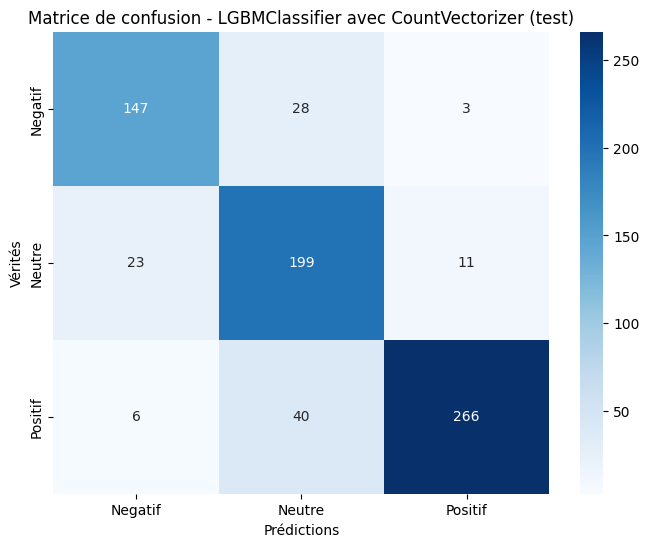

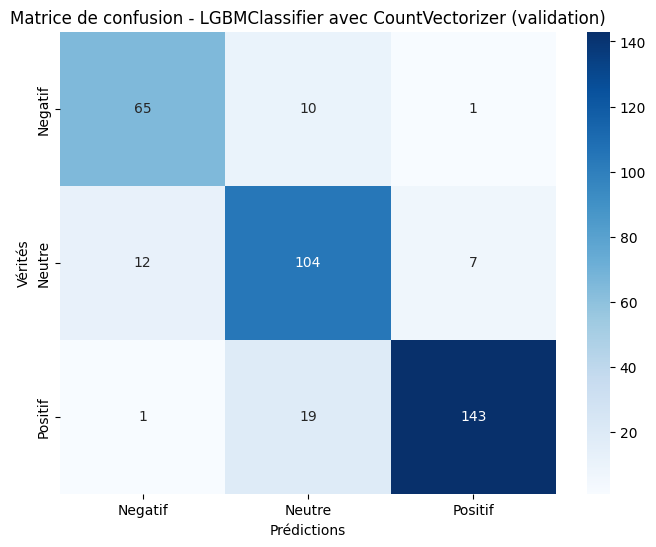

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2832
[LightGBM] [Info] Number of data points in the train set: 2529, number of used features: 422
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Rapport pour LGBMClassifier avec TF-IDF (test):
Accuracy pour LGBMClassifier avec TF-IDF (test): 0.85
              precision    recall  f1-score   support

     Negatif       0.88      0.81      0.84       178
      Neutre       0.74      0.88      0.80       233
     Positif       0.95      0.85      0.90       312

    accuracy                           0.85       723
   macro avg       0.85      0.85      0.85       723
weighted avg       0.86      0.85      0.85       723

Rapport pour LGBMClassifier avec TF-IDF (validation):
Accuracy pour LGBMClassifier avec TF-IDF (validation): 0.85
              precision    recall  f1-score   support

     Negatif       0.80      0.79      0.79        76
      Neutre       0.76      0.84      0.80       123
     Positif       0.96      0.90      0.93       163

    accuracy                           0.85       362
   macro avg       0.84      0.84      0.84       362
weighted avg       0.86      0.85      0.86       362



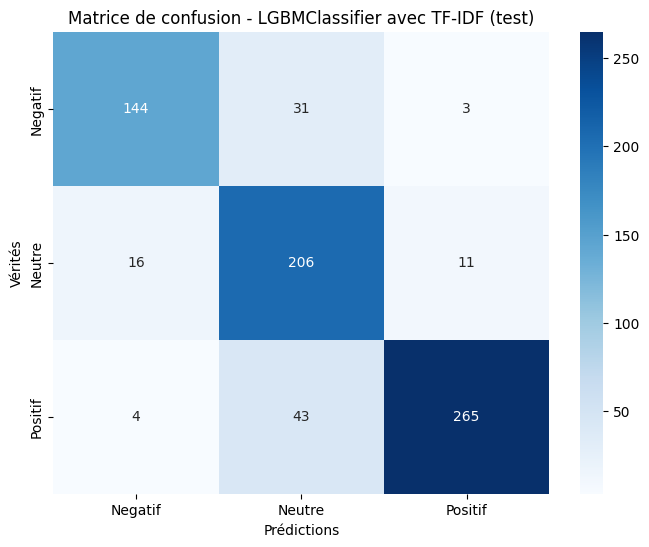

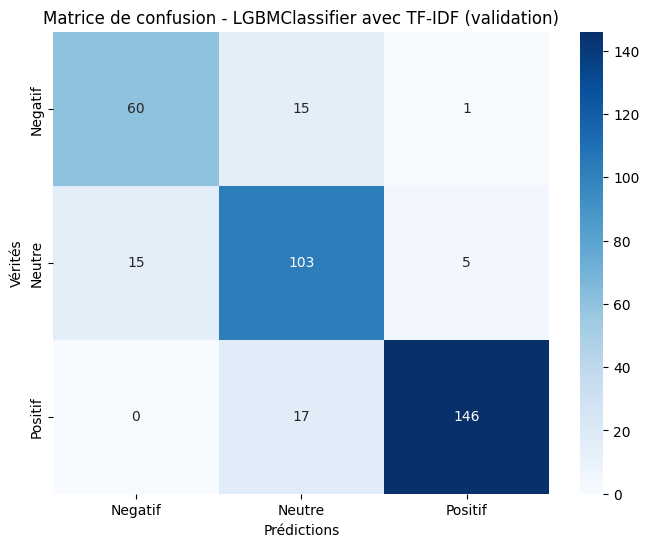

In [ ]:
# Entraînement et évaluation avec TF-IDF
lgbm_model_tfidf = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_tfidf.fit(X_train_tfidf.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_test_tfidf.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_val_tfidf.astype(np.float32))

# Rapport complet pour LGBMClassifier avec TF-IDF (test)
print("Rapport pour LGBMClassifier avec TF-IDF (test):")
accuracy_tfidf_lgbm = accuracy_score(y_test, y_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (test): {accuracy_tfidf_lgbm:.2f}")
print(classification_report(y_test, y_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Rapport complet pour LGBMClassifier avec TF-IDF (validation)
print("Rapport pour LGBMClassifier avec TF-IDF (validation):")
accuracy_val_tfidf_lgbm = accuracy_score(y_val, y_val_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (validation): {accuracy_val_tfidf_lgbm:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec TF-IDF (test)
conf_matrix_tfidf_lgbm = confusion_matrix(y_test, y_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour LGBMClassifier avec TF-IDF (validation)
conf_matrix_val_tfidf_lgbm = confusion_matrix(y_val, y_val_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## <span style="color: #28A745;">**Résultats Comparatifs des Modèles de Classification**</span>

In [ ]:
# Créer un tableau comparatif des résultats
results_comparison = pd.DataFrame({
    "Modèle": [
        "Régression Logistique", "Régression Logistique",
        "SVM", "SVM",
        "Arbre de Décision", "Arbre de Décision",
        "Naive Bayes", "Naive Bayes",
        "LightGBM", "LightGBM"
    ],
    "Vectorisation": [
        "CountVectorizer", "TF-IDF",
        "CountVectorizer", "TF-IDF",
        "CountVectorizer", "TF-IDF",
        "CountVectorizer", "TF-IDF",
        "CountVectorizer", "TF-IDF"
    ],
    "Accuracy (Test)": [
        accuracy_count, accuracy_tfidf,
        accuracy_count_svc, accuracy_tfidf_svc,
        accuracy_count_dt, accuracy_tfidf_dt,
        accuracy_count_nb, accuracy_tfidf_nb,
        accuracy_count_lgbm, accuracy_tfidf_lgbm
    ],
    "Accuracy (Validation)": [
        accuracy_val_count, accuracy_val_tfidf,
        accuracy_val_count_svc, accuracy_val_tfidf_svc,
        accuracy_val_count_dt, accuracy_val_tfidf_dt,
        accuracy_val_count_nb, accuracy_val_tfidf_nb,
        accuracy_val_count_lgbm, accuracy_val_tfidf_lgbm
    ]
})

# Afficher le tableau comparatif
results_comparison.sort_values(by="Accuracy (Test)", ascending=False, inplace=True)
results_comparison.reset_index(drop=True, inplace=True)
print(results_comparison)

# Optionnel : Afficher le tableau sous forme graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=results_comparison, x="Modèle", y="Accuracy (Test)", hue="Vectorisation")
plt.title("Comparaison des Modèles - Accuracy (Test)")
plt.ylabel("Accuracy")
plt.xlabel("Modèle")
plt.legend(title="Vectorisation")
plt.xticks(rotation=45)
plt.show()

<h3 style="text-align: center; color: #E30613;"><b><i>Développé par: OUARAS Khelil Rafik</i></b></h3>